In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import sys
from PIL import Image
import tensorflow as tf
import segmentation_models as sm
from tensorflow.keras import backend as K
from ImageDataAugmentor.image_data_augmentor import *
import albumentations

Segmentation Models: using `tf.keras` framework.


Using TensorFlow backend.


In [2]:
K.set_image_data_format('channels_last')

In [3]:
AUGMENTATIONS = albumentations.Compose([
    albumentations.Transpose(p=0.5),
    albumentations.Flip(p=0.5),
    albumentations.OneOf([
        albumentations.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
        albumentations.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
    ],p=1),
    albumentations.GaussianBlur(p=0.05),
    albumentations.HueSaturationValue(p=0.5),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.ElasticTransform(),
    albumentations.Rotate(limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.3)
])

#model = sm.Unet(backbone_name='resnet18', classes=1,encoder_weights='imagenet', encoder_freeze=True)
#model.compile('Adam', 'binary_crossentropy', ['binary_accuracy'])

In [3]:
def image_preprocessing(x):
    x = x/255. # rescale to [0,1]
    return(x)

def mask_preprocessing(x):
    #x = x[:,:,np.newaxis] # expand from (512,512) to (512,512,1)
    x = x/255. # rescale to [0,1]
    return(x)

In [40]:
img_data_gen = ImageDataAugmentor(augment=AUGMENTATIONS, 
                                  augment_seed=123,
                                  preprocess_input = image_preprocessing)
img_gen = img_data_gen.flow_from_directory('./data/img', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='rgb', 
                                           target_size=(800, 800),
                                           batch_size=8)
mask_data_gen = ImageDataAugmentor(augment=AUGMENTATIONS,
                                   augment_seed=123,
                                   augment_mode='mask',
                                   preprocess_input = mask_preprocessing)
mask_gen = mask_data_gen.flow_from_directory('./data/msk', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='grayscale', 
                                           target_size=(800, 800),
                                           batch_size=8)

train_gen = zip(img_gen, mask_gen)

Found 16028 images belonging to 1 classes.
Found 16028 images belonging to 1 classes.


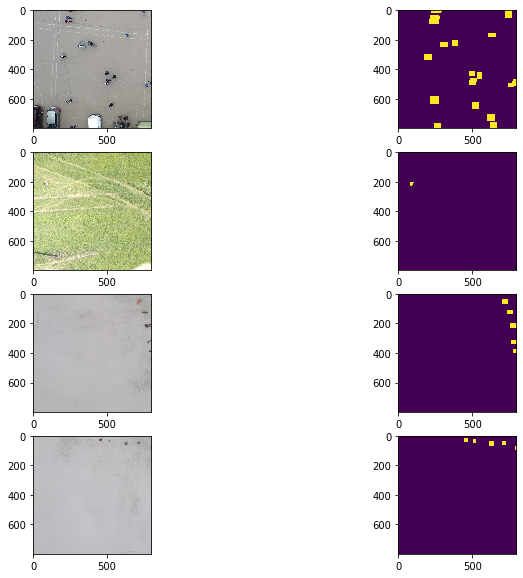

In [43]:
k = 4
image_batch, mask_batch = next(train_gen)
fix, ax = plt.subplots(k,2, figsize=(3*4,10))
for i in range(k):
    ax[i,0].imshow(image_batch[i,:,:,:])
    ax[i,1].imshow(mask_batch[i,:,:,0])
plt.show()

In [6]:
model = sm.Linknet(backbone_name='resnet18', classes=1,encoder_weights='imagenet', encoder_freeze=True)
model.compile('Adam', 
              loss=sm.losses.binary_focal_dice_loss,
              metrics=[sm.metrics.iou_score, sm.metrics.f1_score])

In [ ]:
H = model.fit_generator(train_gen, 
                        steps_per_epoch=1000,
                        epochs=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
 163/1000 [===>..........................] - ETA: 1:45:29 - loss: 0.5671 - iou_score: 0.3316 - f1-score: 0.4505

In [11]:
model.save('linknet_resnet_18_800.h5')

In [13]:
from datetime import datetime
image_batch, mask_batch = next(train_gen)
start = datetime.now()
y_pred = model.predict_on_batch(np.expand_dims(image_batch[0,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred2 = model.predict_on_batch(np.expand_dims(image_batch[1,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred3 = model.predict_on_batch(np.expand_dims(image_batch[2,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred4 = model.predict_on_batch(np.expand_dims(image_batch[3,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred5 = model.predict_on_batch(np.expand_dims(image_batch[4,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred6 = model.predict_on_batch(np.expand_dims(image_batch[5,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred7 = model.predict_on_batch(np.expand_dims(image_batch[6,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred8 = model.predict_on_batch(np.expand_dims(image_batch[7,:,:,:], axis=0))
end = datetime.now()
print(end - start)

0:00:00.034030
0:00:00.020423
0:00:00.019545
0:00:00.019792
0:00:00.020709
0:00:00.020074
0:00:00.020110
0:00:00.019777


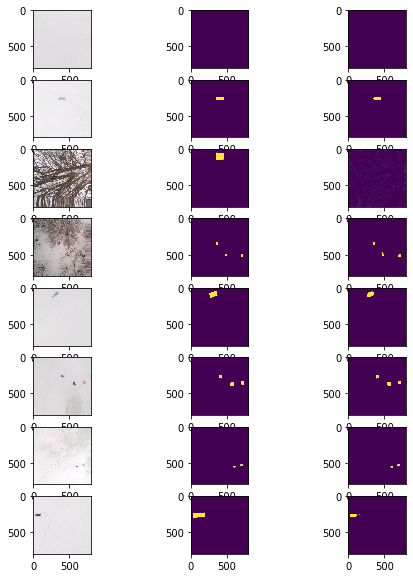

In [14]:
fix, ax = plt.subplots(8,3, figsize=(4*2,10))
ax[0,0].imshow(image_batch[0,:,:,:])
ax[0,1].imshow(mask_batch[0,:,:,0])
ax[0,2].imshow(y_pred[0,:,:,0])
ax[1,0].imshow(image_batch[1,:,:,:])
ax[1,1].imshow(mask_batch[1,:,:,0])
ax[1,2].imshow(y_pred2[0,:,:,0])
ax[2,0].imshow(image_batch[2,:,:,:])
ax[2,1].imshow(mask_batch[2,:,:,0])
ax[2,2].imshow(y_pred3[0,:,:,0])
ax[3,0].imshow(image_batch[3,:,:,:])
ax[3,1].imshow(mask_batch[3,:,:,0])
ax[3,2].imshow(y_pred4[0,:,:,0])
ax[4,0].imshow(image_batch[4,:,:,:])
ax[4,1].imshow(mask_batch[4,:,:,0])
ax[4,2].imshow(y_pred5[0,:,:,0])
ax[5,0].imshow(image_batch[5,:,:,:])
ax[5,1].imshow(mask_batch[5,:,:,0])
ax[5,2].imshow(y_pred6[0,:,:,0])
ax[6,0].imshow(image_batch[6,:,:,:])
ax[6,1].imshow(mask_batch[6,:,:,0])
ax[6,2].imshow(y_pred7[0,:,:,0])
ax[7,0].imshow(image_batch[7,:,:,:])
ax[7,1].imshow(mask_batch[7,:,:,0])
ax[7,2].imshow(y_pred8[0,:,:,0])
plt.show()

In [44]:
AUGMENTATIONS = albumentations.Compose([
    albumentations.Transpose(p=0.5),
    albumentations.Flip(p=0.5),
    albumentations.OneOf([
        albumentations.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
        albumentations.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
    ],p=1),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.ElasticTransform(),
    albumentations.Rotate(limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.3)
])

#model = sm.Unet(backbone_name='resnet18', classes=1,encoder_weights='imagenet', encoder_freeze=True)
#model.compile('Adam', 'binary_crossentropy', ['binary_accuracy'])
img_data_gen = datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=(0.8,1.2),
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=image_preprocessing)
img_gen = img_data_gen.flow_from_directory('./data/img', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='rgb', 
                                           target_size=(800, 800),
                                           batch_size=8)
mask_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=(0.8,1.2),
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=mask_preprocessing)
mask_gen = mask_data_gen.flow_from_directory('./data/msk', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='grayscale', 
                                           target_size=(800, 800),
                                           batch_size=8)

train_gen = zip(img_gen, mask_gen)

#model = sm.Linknet(backbone_name='resnet18', classes=1,encoder_weights='imagenet', encoder_freeze=False)
#model.compile('Adam', 
#              loss=sm.losses.binary_focal_dice_loss,
#              metrics=[sm.metrics.iou_score, sm.metrics.f1_score])
#model.load_weights('linknet_resnet_18_800_full2.h5')

Found 16028 images belonging to 1 classes.
Found 16028 images belonging to 1 classes.


In [45]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./linknet_resnet_18_800-{epoch:04d}.h5', 
    verbose=1, 
    save_weights_only=True,
    save_freq=2000)

H = model.fit_generator(train_gen, 
                        steps_per_epoch=2000,
                        epochs=6,
                        callbacks=[cp_callback]
                        #workers=4,
                        #use_multiprocessing=True,
                        #max_queue_size=8
                       )

Epoch 1/6
1999/2000 [============================>.] - ETA: 1s - loss: 0.2760 - iou_score: 0.5927 - f1-score: 0.7392
Epoch 00001: saving model to ./linknet_resnet_18_800-0001.h5
2000/2000 [==============================] - 3108s 2s/step - loss: 0.2760 - iou_score: 0.5927 - f1-score: 0.7391
Epoch 2/6
1999/2000 [============================>.] - ETA: 1s - loss: 0.2549 - iou_score: 0.6167 - f1-score: 0.7589
Epoch 00002: saving model to ./linknet_resnet_18_800-0002.h5
2000/2000 [==============================] - 3562s 2s/step - loss: 0.2549 - iou_score: 0.6167 - f1-score: 0.7589
Epoch 3/6
1999/2000 [============================>.] - ETA: 1s - loss: 0.2504 - iou_score: 0.6223 - f1-score: 0.7631
Epoch 00003: saving model to ./linknet_resnet_18_800-0003.h5
2000/2000 [==============================] - 3194s 2s/step - loss: 0.2504 - iou_score: 0.6223 - f1-score: 0.7631
Epoch 4/6
1999/2000 [============================>.] - ETA: 1s - loss: 0.2357 - iou_score: 0.6399 - f1-score: 0.7771
Epoch 0000

In [37]:
model.save('linknet_resnet_18_800_full2.h5')

In [14]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_18[0][0]          
____________________________________________________________________________________________

In [24]:
TEST_AUGMENTATIONS = albumentations.Compose([
    albumentations.HorizontalFlip(p=0.5)
])

img_test_data_gen = ImageDataAugmentor(augment=TEST_AUGMENTATIONS, 
                                  augment_seed=123,
                                  preprocess_input = image_preprocessing)
img_test_gen = img_test_data_gen.flow_from_directory('./test_data/img', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='rgb', 
                                           target_size=(800, 800),
                                           batch_size=8)
mask_test_data_gen = ImageDataAugmentor(augment=TEST_AUGMENTATIONS,
                                   augment_seed=123,
                                   augment_mode='mask',
                                   preprocess_input = mask_preprocessing)
mask_test_gen = mask_test_data_gen.flow_from_directory('./test_data/msk', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='grayscale', 
                                           target_size=(800, 800),
                                           batch_size=8)

test_gen = zip(img_test_gen, mask_test_gen)

Found 2756 images belonging to 1 classes.
Found 2756 images belonging to 1 classes.


In [34]:
from datetime import datetime
image_batch, mask_batch = next(test_gen)
start = datetime.now()
y_pred = model.predict_on_batch(np.expand_dims(image_batch[0,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred2 = model.predict_on_batch(np.expand_dims(image_batch[1,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred3 = model.predict_on_batch(np.expand_dims(image_batch[2,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred4 = model.predict_on_batch(np.expand_dims(image_batch[3,:,:,:], axis=0))
end = datetime.now()
print(end - start)

0:00:00.035180
0:00:00.024790
0:00:00.025466
0:00:00.022265


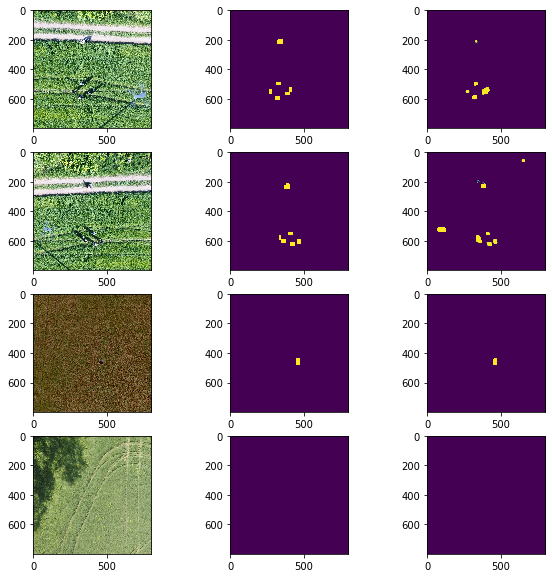

In [35]:
fix, ax = plt.subplots(4,3, figsize=(5*2,10))
ax[0,0].imshow(image_batch[0,:,:,:])
ax[0,1].imshow(mask_batch[0,:,:,0])
ax[0,2].imshow(y_pred[0,:,:,0])
ax[1,0].imshow(image_batch[1,:,:,:])
ax[1,1].imshow(mask_batch[1,:,:,0])
ax[1,2].imshow(y_pred2[0,:,:,0])
ax[2,0].imshow(image_batch[2,:,:,:])
ax[2,1].imshow(mask_batch[2,:,:,0])
ax[2,2].imshow(y_pred3[0,:,:,0])
ax[3,0].imshow(image_batch[3,:,:,:])
ax[3,1].imshow(mask_batch[3,:,:,0])
ax[3,2].imshow(y_pred4[0,:,:,0])
plt.show()

In [102]:
# try om spring

TEST_AUGMENTATIONS = albumentations.Compose([
    albumentations.HorizontalFlip(p=0.5)
])

img_test_data_gen2 = ImageDataAugmentor(augment=TEST_AUGMENTATIONS, 
                                  augment_seed=123,
                                  preprocess_input = image_preprocessing)
img_test_gen2 = img_test_data_gen2.flow_from_directory('./test_data2/img', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='rgb', 
                                           target_size=(512, 512),
                                           batch_size=8)
mask_test_data_gen2 = ImageDataAugmentor(augment=TEST_AUGMENTATIONS,
                                   augment_seed=123,
                                   augment_mode='mask',
                                   preprocess_input = mask_preprocessing)
mask_test_gen2 = mask_test_data_gen2.flow_from_directory('./test_data2/msk', 
                                           class_mode=None, 
                                           shuffle=True, 
                                           seed=123, 
                                           color_mode='grayscale', 
                                           target_size=(512, 512),
                                           batch_size=8)

test_gen2 = zip(img_test_gen2, mask_test_gen2)

Found 4328 images belonging to 1 classes.
Found 4328 images belonging to 1 classes.


In [105]:
from datetime import datetime
image_batch, mask_batch = next(test_gen2)
start = datetime.now()
y_pred = model.predict_on_batch(np.expand_dims(image_batch[0,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred2 = model.predict_on_batch(np.expand_dims(image_batch[1,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred3 = model.predict_on_batch(np.expand_dims(image_batch[2,:,:,:], axis=0))
end = datetime.now()
print(end - start)
start = datetime.now()
y_pred4 = model.predict_on_batch(np.expand_dims(image_batch[3,:,:,:], axis=0))
end = datetime.now()
print(end - start)

0:00:00.034680
0:00:00.015794
0:00:00.015832
0:00:00.015786


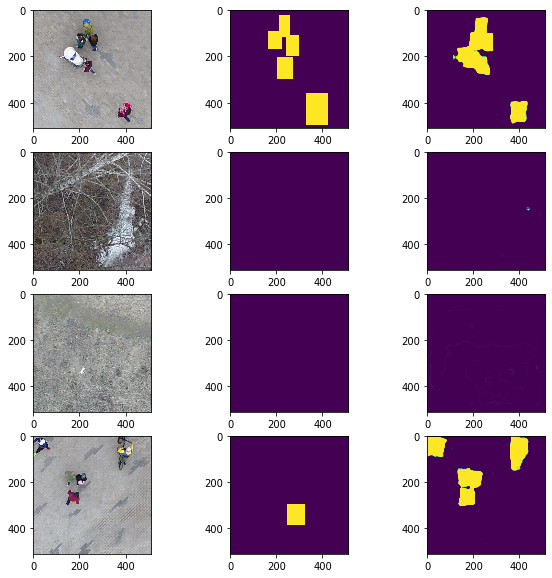

In [106]:
fix, ax = plt.subplots(4,3, figsize=(5*2,10))
ax[0,0].imshow(image_batch[0,:,:,:])
ax[0,1].imshow(mask_batch[0,:,:,0])
ax[0,2].imshow(y_pred[0,:,:,0])
ax[1,0].imshow(image_batch[1,:,:,:])
ax[1,1].imshow(mask_batch[1,:,:,0])
ax[1,2].imshow(y_pred2[0,:,:,0])
ax[2,0].imshow(image_batch[2,:,:,:])
ax[2,1].imshow(mask_batch[2,:,:,0])
ax[2,2].imshow(y_pred3[0,:,:,0])
ax[3,0].imshow(image_batch[3,:,:,:])
ax[3,1].imshow(mask_batch[4,:,:,0])
ax[3,2].imshow(y_pred4[0,:,:,0])
plt.show()